In [126]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\hp\Downloads\archive (2)\transaction_dataset.csv',index_col=0)

In [127]:
df = df.drop(df.columns[:2], axis=1)

In [128]:
df.dtypes

FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                                            float64
min value sent to contract              

In [129]:
category = df.select_dtypes('O').columns.astype('category')
df[category]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [130]:
category

CategoricalIndex([' ERC20 most sent token type', ' ERC20_most_rec_token_type'], categories=[' ERC20 most sent token type', ' ERC20_most_rec_token_type'], ordered=False, dtype='category')

In [131]:
df.fillna('', inplace=True)

In [132]:
#df[category].fillna('', inplace=True)
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
# Tokenize the categorical columns
mlb = MultiLabelBinarizer()
tokenized = mlb.fit_transform(df[category].values)

# Create a new DataFrame with the tokenized data
tokenized_df = pd.DataFrame(tokenized, columns=mlb.classes_, index=df[category].index)

print(tokenized_df)

              $7RIP$  $P4C3  ''  0  0xBitcoin Token  0xcert Protocol Token  \
0     0  0  0       0      0   0  0                0                      0   
1     0  0  0       0      0   0  0                0                      0   
2     1  0  0       0      0   0  0                0                      0   
3     0  0  0       0      0   0  0                0                      0   
4     0  0  0       0      0   0  0                0                      0   
...  .. .. ..     ...    ...  .. ..              ...                    ...   
9836  0  0  1       0      0   0  0                0                      0   
9837  0  0  1       0      0   0  0                0                      0   
9838  0  0  1       0      0   0  0                0                      0   
9839  1  0  0       0      0   0  0                0                      0   
9840  0  0  1       0      0   0  0                0                      0   

      1World  ...  iXledger  minereum  realchain  s

In [133]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
# Assuming 'tokenized_df' is your DataFrame after tokenization

# Standardize the data
scaler = StandardScaler()
tokenized_scaled = scaler.fit_transform(tokenized_df)

# Apply PCA
pca_df = pd.DataFrame(data=tokenized_pca)
pca_df.columns = pca_df.columns.astype(str)

# Print the original column names corresponding to the PCA components
original_column_names = tokenized_df.columns
for i, col in enumerate(pca_df.columns):
    print(f"PCA Component {i} corresponds to original column: {original_column_names[i]}")

print("Original shape:", tokenized_df.shape)
print("Reduced shape:", pca_df.shape)


PCA Component 0 corresponds to original column: 
PCA Component 1 corresponds to original column: 
PCA Component 2 corresponds to original column:  
PCA Component 3 corresponds to original column: $7RIP$
PCA Component 4 corresponds to original column: $P4C3
PCA Component 5 corresponds to original column: ''
PCA Component 6 corresponds to original column: 0
PCA Component 7 corresponds to original column: 0xBitcoin Token
PCA Component 8 corresponds to original column: 0xcert Protocol Token
PCA Component 9 corresponds to original column: 1World
PCA Component 10 corresponds to original column: 1irst
PCA Component 11 corresponds to original column: 21Million
PCA Component 12 corresponds to original column: 300 Token
PCA Component 13 corresponds to original column: A2A(B) STeX Exchange Token
PCA Component 14 corresponds to original column: ABCC invite
Original shape: (9841, 575)
Reduced shape: (9841, 15)


In [134]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.398092,-0.024818,2.997414e-08,5.498206e-15,-8.754282e-15,-1.735428e-15,-1.570142e-14,-6.118370e-15,7.624110e-16,-1.805847e-14,1.203291e-14,-4.479056e-15,2.892218e-15,4.485128e-15,7.093284e-15
1,-0.099561,-0.470893,1.751151e-03,6.647989e-13,5.137791e-13,-3.318641e-13,-1.042132e-12,9.647292e-13,5.175981e-16,-1.667319e-12,-2.651715e-12,-9.680458e-13,-4.094977e-12,3.420241e-12,1.075134e-12
2,-1.000843,-1.214663,4.507447e-03,1.708835e-12,1.321435e-12,-8.526240e-13,-2.682549e-12,2.480763e-12,-1.080950e-15,-4.292909e-12,-6.817485e-12,-2.489255e-12,-1.052978e-11,8.796822e-12,2.770180e-12
3,-0.542239,-0.754912,2.775029e-03,1.032117e-12,8.005818e-13,-5.201127e-13,-1.635399e-12,1.519532e-12,-1.316850e-14,-2.617989e-12,-4.228481e-12,-1.543781e-12,-6.511891e-12,5.423376e-12,1.724366e-12
4,-0.373186,0.056740,-3.076823e-04,-1.133915e-13,-8.861748e-14,5.617008e-14,1.817951e-13,-1.702640e-13,-4.845733e-15,3.008991e-13,4.629413e-13,1.696083e-13,7.198933e-13,-6.071168e-13,-1.759174e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,3.684910,-0.512244,2.048632e-03,7.820541e-13,5.972401e-13,-3.865587e-13,-1.218983e-12,1.124531e-12,-1.837289e-15,-1.953109e-12,-3.110595e-12,-1.134210e-12,-4.802690e-12,4.008445e-12,1.246780e-12
9837,4.011079,-0.552946,2.215085e-03,8.443511e-13,6.461697e-13,-4.180309e-13,-1.317671e-12,1.215574e-12,-1.880223e-15,-2.112598e-12,-3.360447e-12,-1.225376e-12,-5.194252e-12,4.333817e-12,1.348030e-12
9838,3.457046,-0.534833,2.124794e-03,8.091861e-13,6.198557e-13,-4.015866e-13,-1.266186e-12,1.167024e-12,-4.180033e-15,-2.024769e-12,-3.223215e-12,-1.175148e-12,-4.980248e-12,4.154070e-12,1.295026e-12
9839,-0.752665,-0.686889,2.538040e-03,9.630621e-13,7.446899e-13,-4.805989e-13,-1.511389e-12,1.398162e-12,9.042246e-17,-2.416859e-12,-3.840331e-12,-1.402361e-12,-5.929652e-12,4.953769e-12,1.560414e-12


In [135]:
concatenated_df = pd.concat([df, pca_df], axis=1)


In [136]:
concatenated_df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,5,6,7,8,9,10,11,12,13,14
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,-1.735428e-15,-1.570142e-14,-6.118370e-15,7.624110e-16,-1.805847e-14,1.203291e-14,-4.479056e-15,2.892218e-15,4.485128e-15,7.093284e-15
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,-3.318641e-13,-1.042132e-12,9.647292e-13,5.175981e-16,-1.667319e-12,-2.651715e-12,-9.680458e-13,-4.094977e-12,3.420241e-12,1.075134e-12
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,-8.526240e-13,-2.682549e-12,2.480763e-12,-1.080950e-15,-4.292909e-12,-6.817485e-12,-2.489255e-12,-1.052978e-11,8.796822e-12,2.770180e-12
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,-5.201127e-13,-1.635399e-12,1.519532e-12,-1.316850e-14,-2.617989e-12,-4.228481e-12,-1.543781e-12,-6.511891e-12,5.423376e-12,1.724366e-12
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,5.617008e-14,1.817951e-13,-1.702640e-13,-4.845733e-15,3.008991e-13,4.629413e-13,1.696083e-13,7.198933e-13,-6.071168e-13,-1.759174e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,-3.865587e-13,-1.218983e-12,1.124531e-12,-1.837289e-15,-1.953109e-12,-3.110595e-12,-1.134210e-12,-4.802690e-12,4.008445e-12,1.246780e-12
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,-4.180309e-13,-1.317671e-12,1.215574e-12,-1.880223e-15,-2.112598e-12,-3.360447e-12,-1.225376e-12,-5.194252e-12,4.333817e-12,1.348030e-12
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,-4.015866e-13,-1.266186e-12,1.167024e-12,-4.180033e-15,-2.024769e-12,-3.223215e-12,-1.175148e-12,-4.980248e-12,4.154070e-12,1.295026e-12
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,-4.805989e-13,-1.511389e-12,1.398162e-12,9.042246e-17,-2.416859e-12,-3.840331e-12,-1.402361e-12,-5.929652e-12,4.953769e-12,1.560414e-12


In [137]:
concatenated_df.fillna(np.mean,inplace=True)

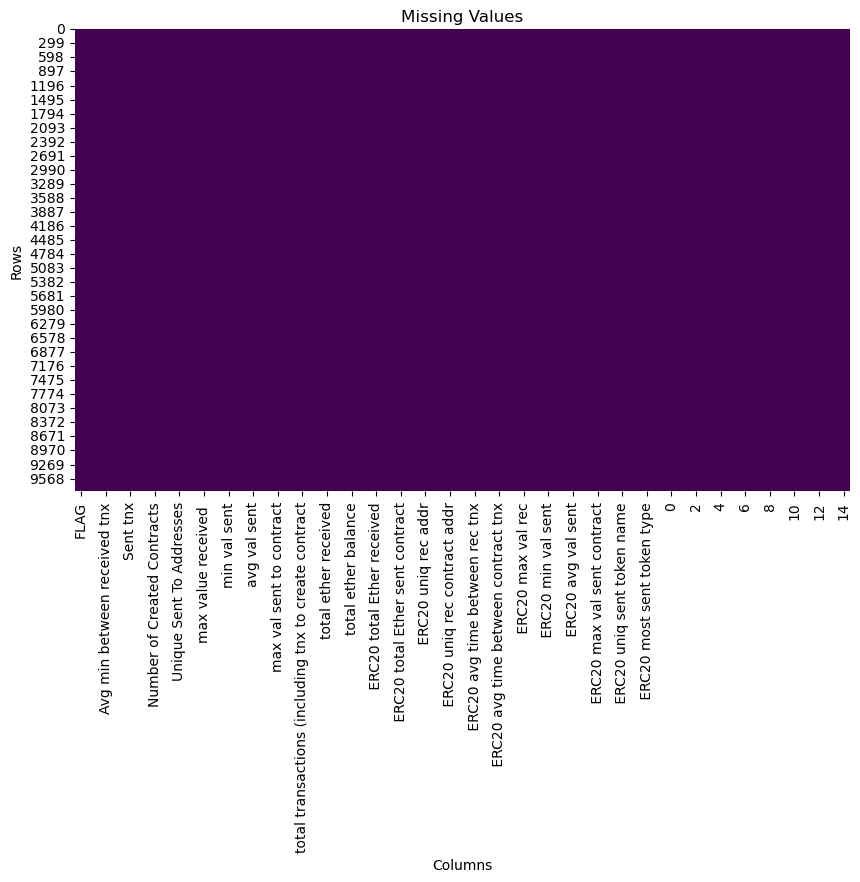

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display missing values
plt.figure(figsize=(10, 6))
sns.heatmap(concatenated_df.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [139]:
concatenated_df.columns=concatenated_df.columns.str.replace(' ', '_')

In [140]:
concatenated_df.columns

Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received_',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions_(including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance',
       '_Total_ERC20_tnxs', '_ERC20_total_Ether_received',
       '_ERC20_total_ether_sent', '_ERC20_total_Ether_sent_contract',
       '_ERC20_uniq_sent_addr', '_ERC20_uniq_rec_addr',
       '_ERC20_uniq_sent_addr.1', '_ERC20_uniq_rec_contract_addr',
       '_ERC20_avg_time_between_sent_tnx', '_ERC20_avg_time_between_rec_tnx',
       '_ERC20

In [141]:
concatenated_df

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,5,6,7,8,9,10,11,12,13,14
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,-1.735428e-15,-1.570142e-14,-6.118370e-15,7.624110e-16,-1.805847e-14,1.203291e-14,-4.479056e-15,2.892218e-15,4.485128e-15,7.093284e-15
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,-3.318641e-13,-1.042132e-12,9.647292e-13,5.175981e-16,-1.667319e-12,-2.651715e-12,-9.680458e-13,-4.094977e-12,3.420241e-12,1.075134e-12
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,-8.526240e-13,-2.682549e-12,2.480763e-12,-1.080950e-15,-4.292909e-12,-6.817485e-12,-2.489255e-12,-1.052978e-11,8.796822e-12,2.770180e-12
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,-5.201127e-13,-1.635399e-12,1.519532e-12,-1.316850e-14,-2.617989e-12,-4.228481e-12,-1.543781e-12,-6.511891e-12,5.423376e-12,1.724366e-12
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,5.617008e-14,1.817951e-13,-1.702640e-13,-4.845733e-15,3.008991e-13,4.629413e-13,1.696083e-13,7.198933e-13,-6.071168e-13,-1.759174e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,-3.865587e-13,-1.218983e-12,1.124531e-12,-1.837289e-15,-1.953109e-12,-3.110595e-12,-1.134210e-12,-4.802690e-12,4.008445e-12,1.246780e-12
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,-4.180309e-13,-1.317671e-12,1.215574e-12,-1.880223e-15,-2.112598e-12,-3.360447e-12,-1.225376e-12,-5.194252e-12,4.333817e-12,1.348030e-12
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,-4.015866e-13,-1.266186e-12,1.167024e-12,-4.180033e-15,-2.024769e-12,-3.223215e-12,-1.175148e-12,-4.980248e-12,4.154070e-12,1.295026e-12
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,-4.805989e-13,-1.511389e-12,1.398162e-12,9.042246e-17,-2.416859e-12,-3.840331e-12,-1.402361e-12,-5.929652e-12,4.953769e-12,1.560414e-12


In [142]:
concatenated_df

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,5,6,7,8,9,10,11,12,13,14
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,-1.735428e-15,-1.570142e-14,-6.118370e-15,7.624110e-16,-1.805847e-14,1.203291e-14,-4.479056e-15,2.892218e-15,4.485128e-15,7.093284e-15
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,-3.318641e-13,-1.042132e-12,9.647292e-13,5.175981e-16,-1.667319e-12,-2.651715e-12,-9.680458e-13,-4.094977e-12,3.420241e-12,1.075134e-12
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,-8.526240e-13,-2.682549e-12,2.480763e-12,-1.080950e-15,-4.292909e-12,-6.817485e-12,-2.489255e-12,-1.052978e-11,8.796822e-12,2.770180e-12
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,-5.201127e-13,-1.635399e-12,1.519532e-12,-1.316850e-14,-2.617989e-12,-4.228481e-12,-1.543781e-12,-6.511891e-12,5.423376e-12,1.724366e-12
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,5.617008e-14,1.817951e-13,-1.702640e-13,-4.845733e-15,3.008991e-13,4.629413e-13,1.696083e-13,7.198933e-13,-6.071168e-13,-1.759174e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,-3.865587e-13,-1.218983e-12,1.124531e-12,-1.837289e-15,-1.953109e-12,-3.110595e-12,-1.134210e-12,-4.802690e-12,4.008445e-12,1.246780e-12
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,-4.180309e-13,-1.317671e-12,1.215574e-12,-1.880223e-15,-2.112598e-12,-3.360447e-12,-1.225376e-12,-5.194252e-12,4.333817e-12,1.348030e-12
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,-4.015866e-13,-1.266186e-12,1.167024e-12,-4.180033e-15,-2.024769e-12,-3.223215e-12,-1.175148e-12,-4.980248e-12,4.154070e-12,1.295026e-12
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,-4.805989e-13,-1.511389e-12,1.398162e-12,9.042246e-17,-2.416859e-12,-3.840331e-12,-1.402361e-12,-5.929652e-12,4.953769e-12,1.560414e-12


In [143]:
# Copy the DataFrame to avoid modifying the original
normalized = concatenated_df.copy()


# Columns to be normalized (excluding 'FLAG')


In [144]:
normalized[columns_to_normalize]=normalized[columns_to_normalize].replace('', np.nan, regex=True)

In [145]:
from sklearn.preprocessing import StandardScaler

# Columns to normalize (excluding 'FLAG')
columns_to_normalize = concatenated_df.columns.difference(['FLAG'])

# Select only numeric columns for normalization
numeric_df = concatenated_df[columns_to_normalize].select_dtypes(include=[float, int])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numeric columns
normalized_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns, index=numeric_df.index)

# Combine the normalized numeric columns with the non-numeric columns
normalized_concatenated_df = pd.concat([normalized_numeric_df, concatenated_df.drop(columns=columns_to_normalize)], axis=1)




In [146]:
normalized_concatenated_df

,0,1,10,11,12,13,14,2,3,4,...,max_value_received_,min_val_sent,min_value_received,min_value_sent_to_contract,total_Ether_sent,total_ether_balance,total_ether_received,total_ether_sent_contracts,total_transactions_(including_tnx_to_create_contract,FLAG
0,-0.275811,-0.017515,1.047669e-14,-2.428796e-15,4.895754e-15,8.841673e-16,4.320125e-15,2.119333e-08,3.380929e-15,-6.534500e-15,...,-0.036696,-0.034632,-0.134530,-0.013526,-0.025942,-0.007246,-0.030347,-0.014979,0.389428,0
1,-0.068979,-0.332333,-1.872982e-12,-6.837388e-13,-2.892588e-12,2.416065e-12,7.595005e-13,1.238158e-03,4.695533e-13,3.629336e-13,...,-0.040016,-0.034632,-0.134530,-0.013526,-0.028350,-0.006095,-0.031949,-0.014979,-0.134110,0
2,-0.693418,-0.857248,-4.818476e-12,-1.759342e-12,-7.442451e-12,6.217689e-12,1.958018e-12,3.187008e-03,1.207761e-12,9.340037e-13,...,-0.040128,-0.034271,-0.134183,-0.013526,-0.028348,-0.006095,-0.031947,-0.014979,-0.200662,0
3,-0.375682,-0.532779,-2.987867e-12,-1.090824e-12,-4.601517e-12,3.832424e-12,1.218554e-12,1.962095e-03,7.292732e-13,5.657235e-13,...,-0.001780,-0.034632,-0.134530,-0.013526,-0.023474,-0.009620,-0.029498,-0.014979,-0.184394,0
4,-0.258556,0.040044,3.293009e-13,1.206633e-13,5.118663e-13,-4.315617e-13,-1.250814e-13,-2.175480e-04,-8.068252e-14,-6.300344e-14,...,-0.039233,-0.034632,-0.134530,-0.013526,-0.028067,-0.006304,-0.031810,-0.014979,3.206037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,2.553031,-0.361516,-2.197443e-12,-8.012288e-13,-3.392992e-12,2.831968e-12,8.808662e-13,1.448493e-03,5.524610e-13,4.219465e-13,...,-0.039295,-0.031274,-0.134518,-0.013526,-0.028256,-0.006095,-0.031856,-0.014979,-0.196965,1
9837,2.779012,-0.390241,-2.374106e-12,-8.656895e-13,-3.669854e-12,3.062029e-12,9.524575e-13,1.566185e-03,5.965093e-13,4.565432e-13,...,-0.040217,-0.034632,-0.134530,-0.013526,-0.028358,-0.006095,-0.031957,-0.014979,-0.209536,1
9838,2.395159,-0.377458,-2.277073e-12,-8.301747e-13,-3.518537e-12,2.934935e-12,9.149796e-13,1.502344e-03,5.716452e-13,4.379373e-13,...,-0.038579,-0.034603,-0.134527,-0.013526,-0.028186,-0.006130,-0.031811,-0.014979,-0.128195,1
9839,-0.521472,-0.484772,-2.713417e-12,-9.908302e-13,-4.189833e-12,3.500379e-12,1.102628e-12,1.794531e-03,6.804464e-13,5.262039e-13,...,-0.040179,-0.034632,-0.132996,-0.013526,-0.028358,-0.006092,-0.031956,-0.014979,-0.208796,1


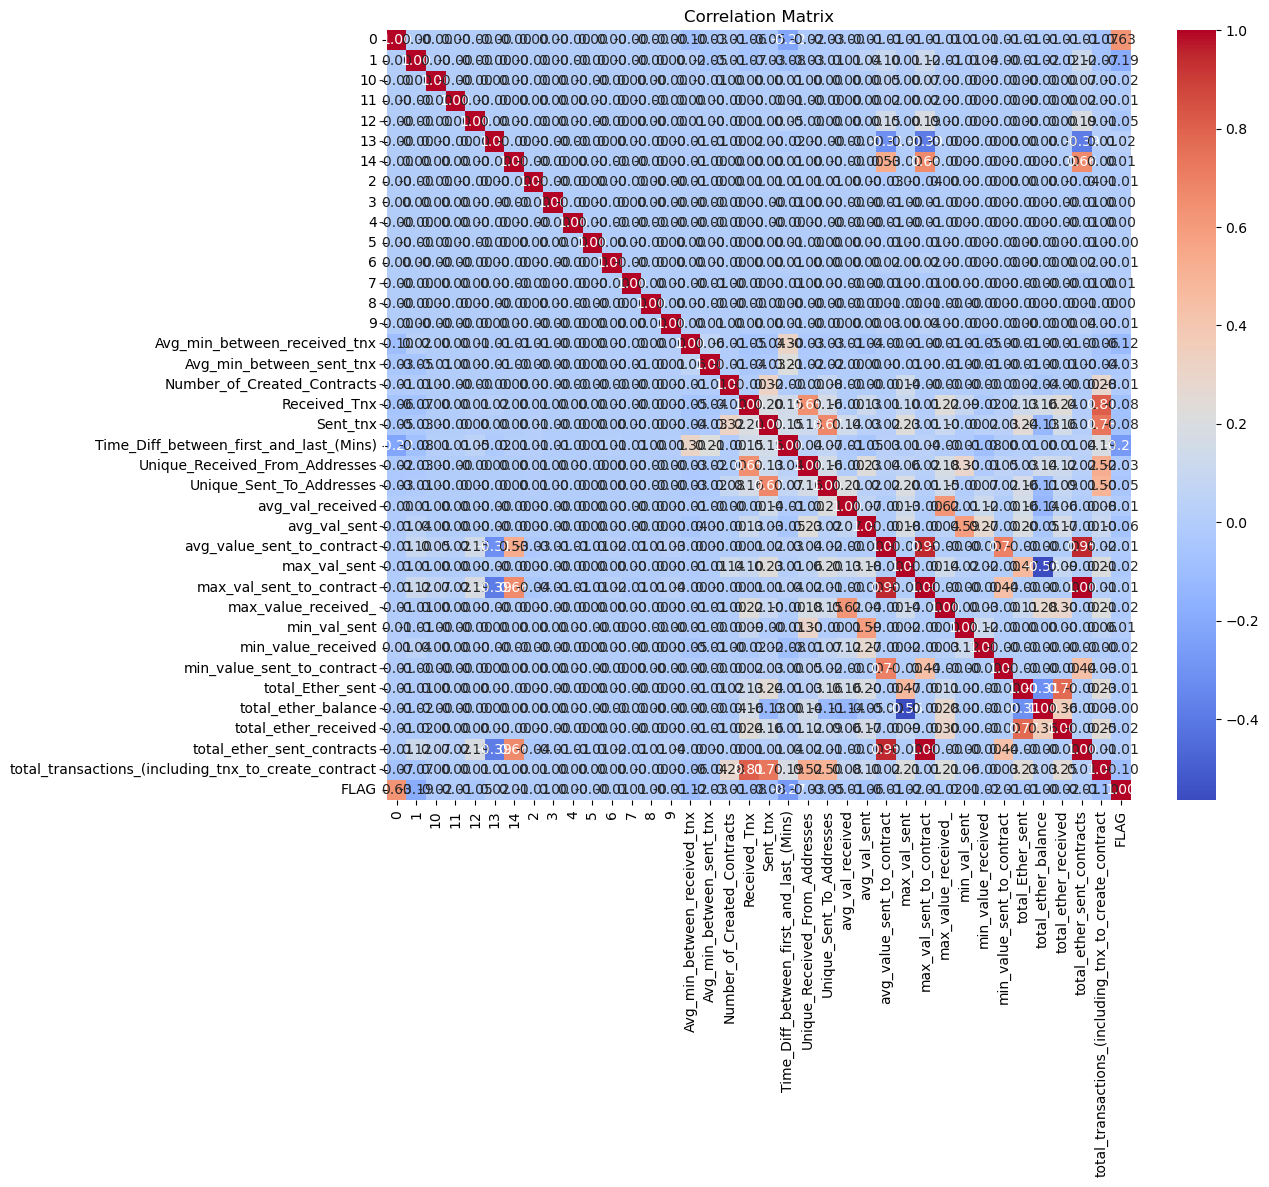

Top Features:
0                                                       0.632302
Time_Diff_between_first_and_last_(Mins)                 0.269354
1                                                       0.190306
Avg_min_between_received_tnx                            0.118533
total_transactions_(including_tnx_to_create_contract    0.100289
Received_Tnx                                            0.079316
Sent_tnx                                                0.078006
avg_val_sent                                            0.063556
12                                                      0.046323
Unique_Sent_To_Addresses                                0.045584
Name: FLAG, dtype: float64


In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming normalized is your DataFrame and FLAG is the target column
# Calculate the correlation matrix
corr_matrix = normalized_concatenated_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify the features that have the highest absolute correlation values with the target column
target_correlation = corr_matrix['FLAG'].abs().sort_values(ascending=False)

# Select the top features based on their correlation values
top_features = target_correlation[1:11]  # Excluding the target column itself

print("Top Features:")
print(top_features)


In [148]:
column_names = top_features.index.tolist()

print(column_names)

['0', 'Time_Diff_between_first_and_last_(Mins)', '1', 'Avg_min_between_received_tnx', 'total_transactions_(including_tnx_to_create_contract', 'Received_Tnx', 'Sent_tnx', 'avg_val_sent', '12', 'Unique_Sent_To_Addresses']


In [149]:
X = normalized_concatenated_df[column_names]
y = normalized_concatenated_df['FLAG'].astype(int)

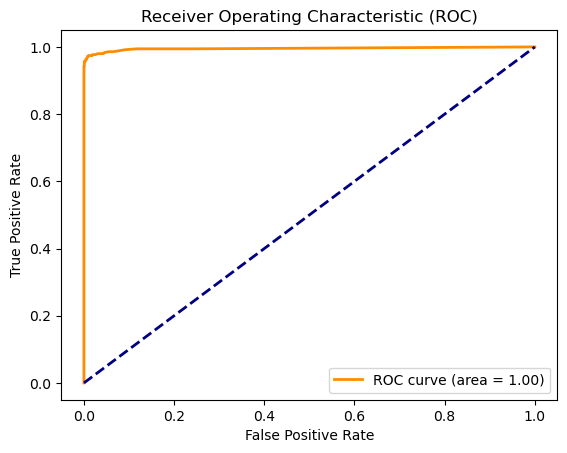

Accuracy: 0.9885714285714285


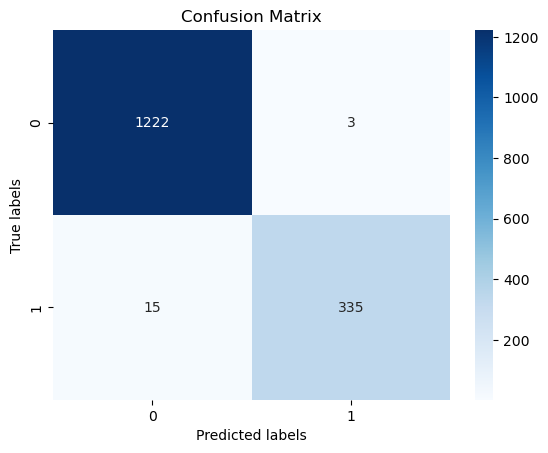

ROC AUC on validation set: 0.9951976676384839
Accuracy on validation set: 0.9885714285714285


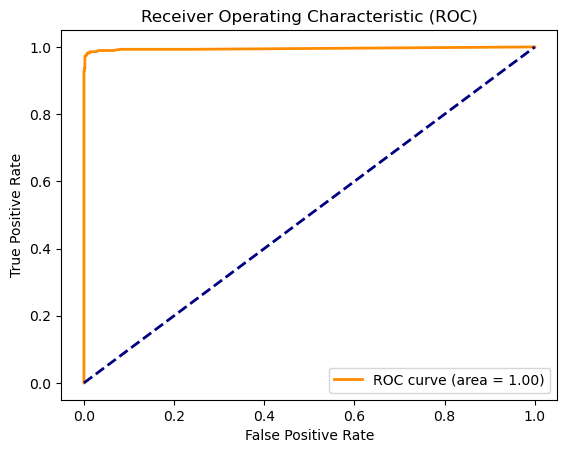

Accuracy: 0.9888888888888889


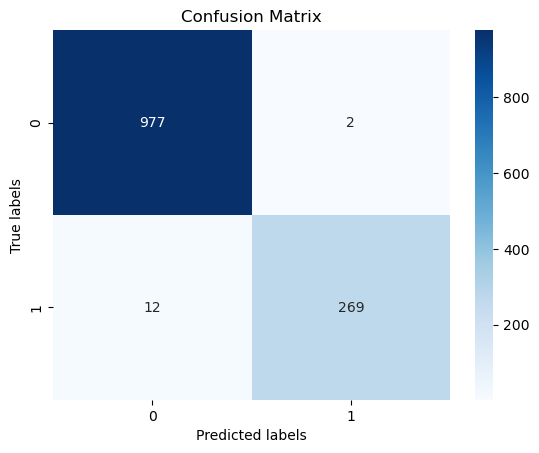

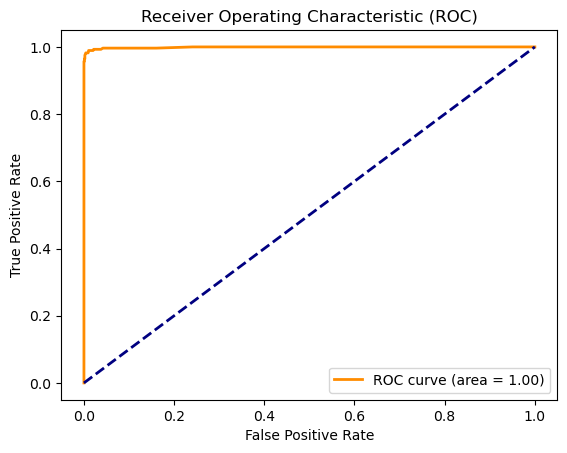

Accuracy: 0.9920634920634921


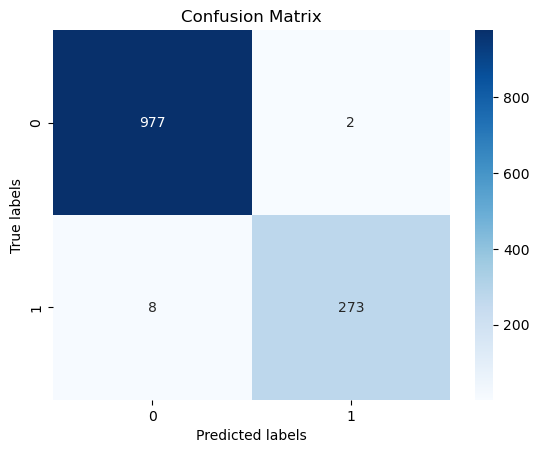

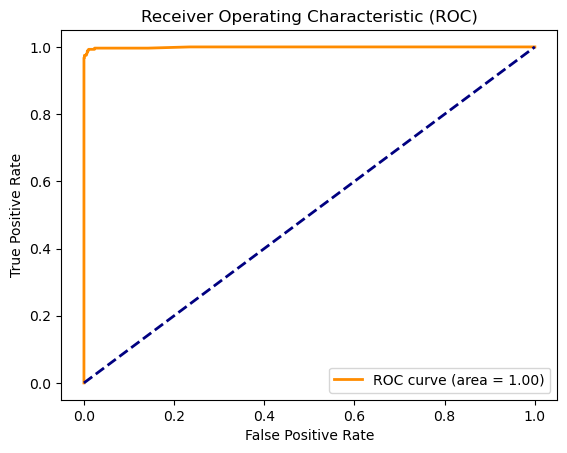

Accuracy: 0.9928514694201748


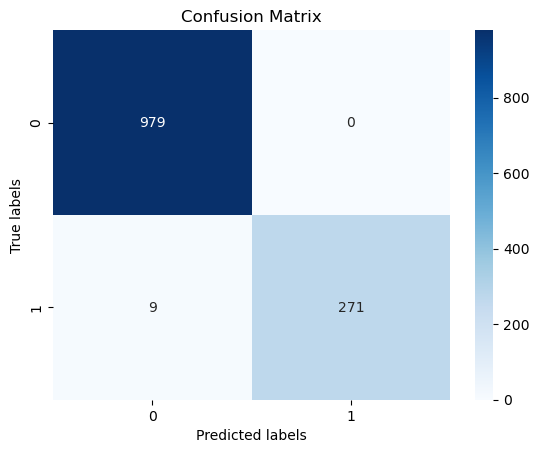

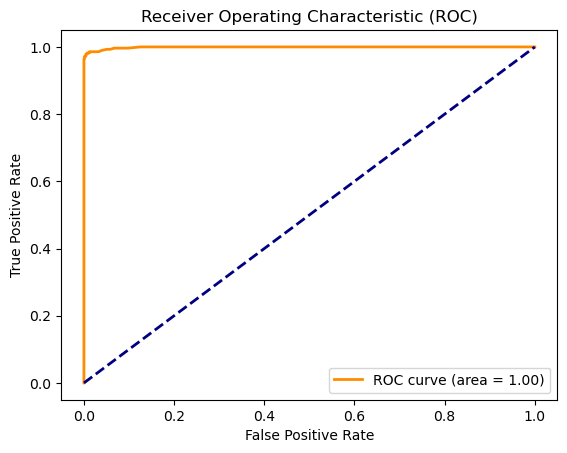

Accuracy: 0.9920571882446386


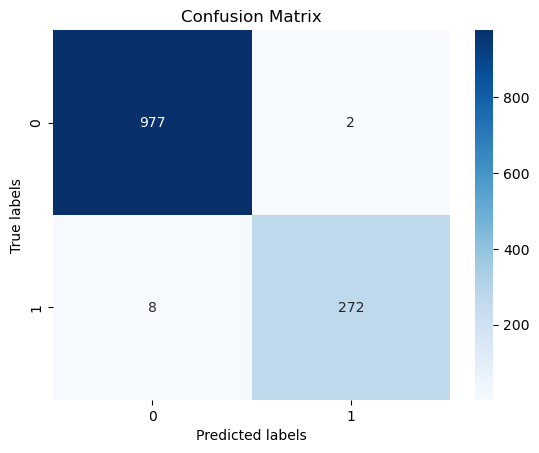

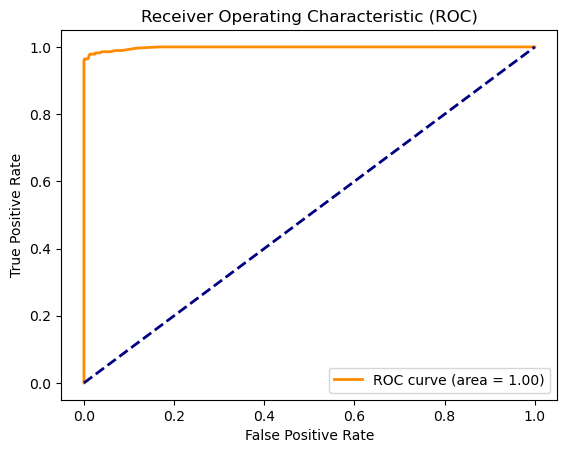

Accuracy: 0.9904686258935663


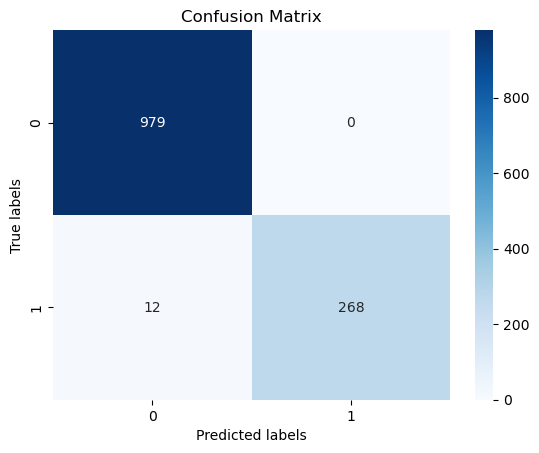

Mean ROC AUC: 0.9980493074441252
Mean Accuracy: 0.991265932902152
Mean ROC AUC: 0.9980493074441252
Mean Accuracy: 0.991265932902152


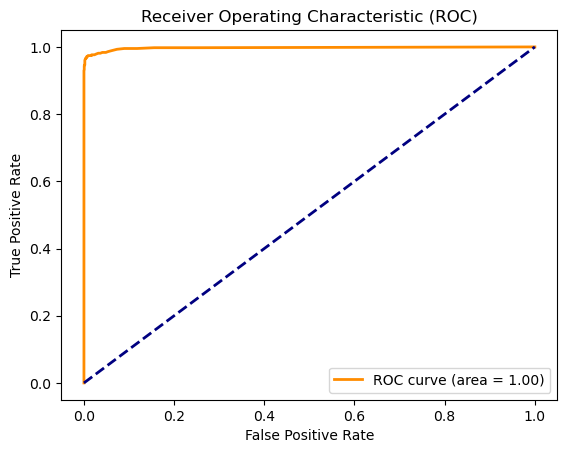

Accuracy: 0.98933468765871


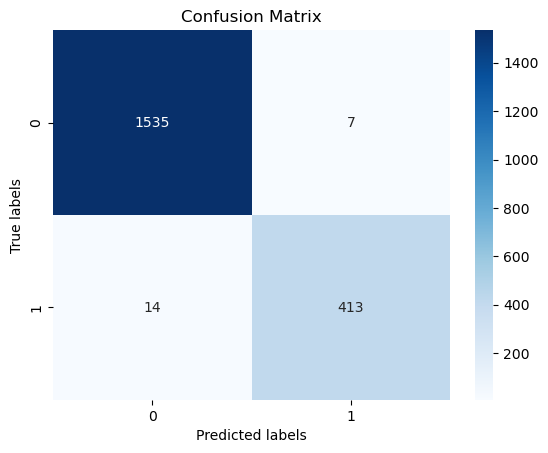

ROC AUC on test set: 0.9970976589908784
Accuracy on test set: 0.98933468765871


In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

class BinaryClassifier:
    def __init__(self, model=None):
        if model is None:
            self.model = RandomForestClassifier()  # You can change the model here
        else:
            self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred_proba = self.model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}')

        cm = confusion_matrix(y_test, y_pred)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

        return roc_auc, accuracy

    def cross_validate(self, X, y, n_splits=5):
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True)
        roc_aucs = []
        accuracies = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            self.train(X_train, y_train)
            roc_auc, accuracy = self.evaluate(X_test, y_test)
            roc_aucs.append(roc_auc)
            accuracies.append(accuracy)

        mean_roc_auc = np.mean(roc_aucs)
        mean_accuracy = np.mean(accuracies)
        print(f'Mean ROC AUC: {mean_roc_auc}')
        print(f'Mean Accuracy: {mean_accuracy}')
        return mean_roc_auc, mean_accuracy



# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = BinaryClassifier()
model.train(X_train, y_train)

# Evaluate on validation set
roc_auc_val, accuracy_val = model.evaluate(X_val, y_val)
print(f'ROC AUC on validation set: {roc_auc_val}')
print(f'Accuracy on validation set: {accuracy_val}')

# Perform k-fold cross-validation
roc_auc_mean, accuracy_mean = model.cross_validate(X_train, y_train, n_splits=5)
print(f'Mean ROC AUC: {roc_auc_mean}')
print(f'Mean Accuracy: {accuracy_mean}')

# Evaluate on test set
roc_auc_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'ROC AUC on test set: {roc_auc_test}')
print(f'Accuracy on test set: {accuracy_test}')
